In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.speedObservatory import Speed_observatory
import matplotlib.pylab as plt
import healpy as hp

In [2]:
survey_length = 0.3 # days
# Define what we want the final visit ratio map to look like
filtername = 'r'

target_map = fs.standard_goals()[filtername]

bfs = []
bfs.append(fs.Depth_percentile_basis_function(filtername=filtername))
bfs.append(fs.Target_map_basis_function(target_map=target_map, filtername=filtername, out_of_bounds_val=hp.UNSEEN))
bfs.append(fs.North_south_patch_basis_function(zenith_min_alt=50.))
bfs.append(fs.Slewtime_basis_function(filtername=filtername))

weights = np.array([1, 0.2, 1., 2.])
survey = fs.Greedy_survey_fields(bfs, weights, block_size=1, filtername=filtername)
scheduler = fs.Core_scheduler([survey])

In [3]:
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='one_filter_testing.db',
                                                     delete_past=True)


/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


progress = 97.6%Completed 666 observations


In [5]:
status = observatory.return_status()
r1 = status['lmst']*180/12
r2 = np.degrees(observatory.obs.lat)

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


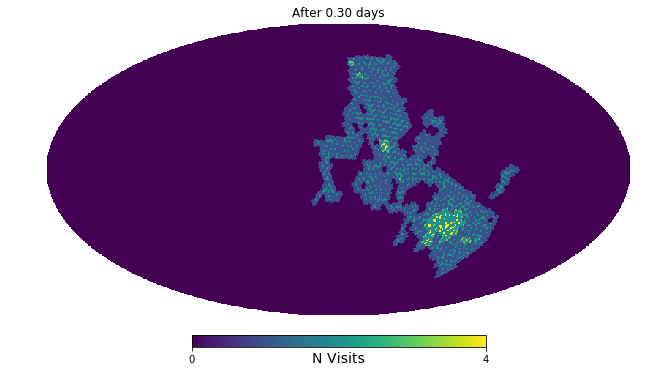

In [6]:

for survey in scheduler.surveys:
    hp.mollview(survey.basis_functions[1].survey_features['N_obs'].feature,  unit='N Visits', rot=(r1,r2), title='After %.2f days'%survey_length)

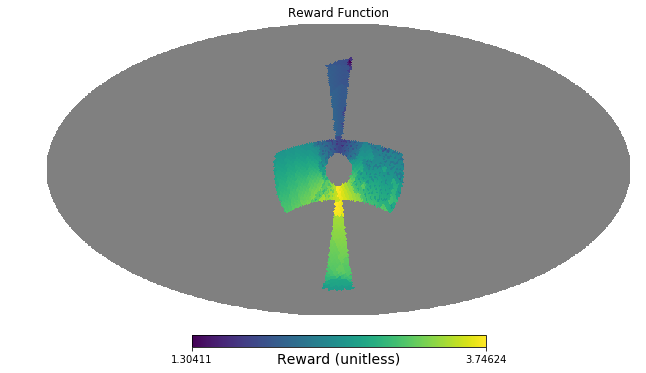

In [7]:
for survey in scheduler.surveys:
    hp.mollview(survey.reward, rot=(r1,r2), title='Reward Function', unit='Reward (unitless)')

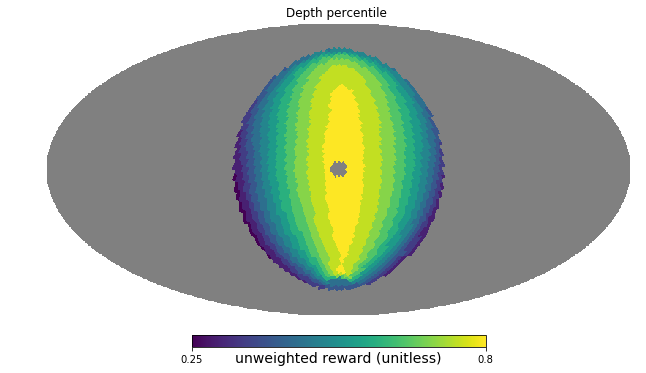

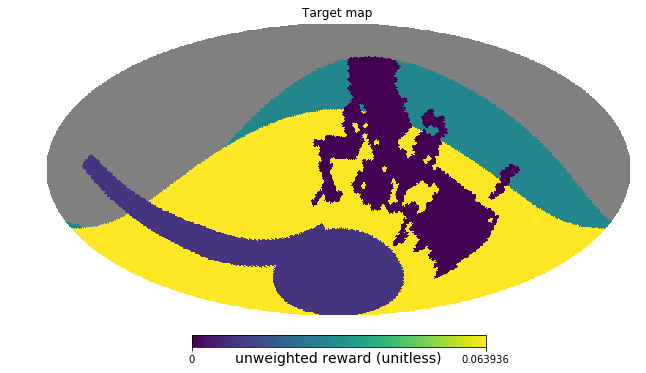

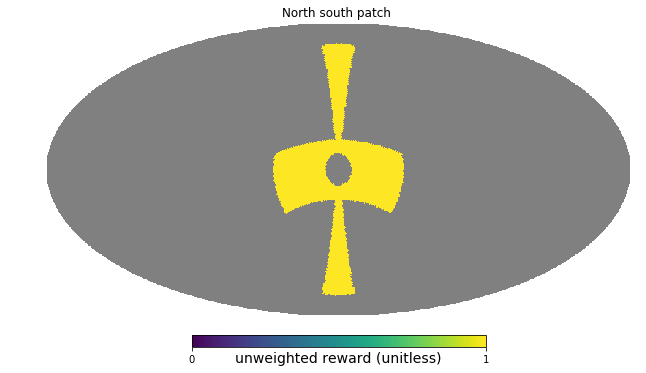

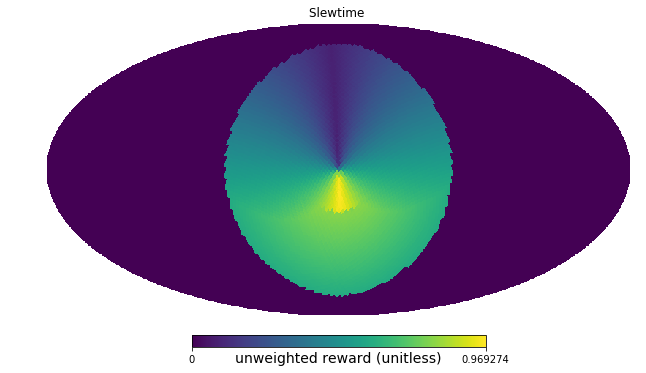

In [8]:
for bf in scheduler.surveys[0].basis_functions:
    val = bf()
    if np.size(val) == 1:
        print(val)
    else:
        if np.min(val) < 0:
            plotmin = 0
        else:
            plotmin = None
        hp.mollview(val, rot=(r1,r2), title=bf.__class__.__name__.replace('basis_function', '').replace('_', ' '),
                   unit='unweighted reward (unitless)', min=plotmin)

In [9]:
scheduler.surveys[0].basis_functions[0].__class__.__name__.replace('basis_function', '').replace('_', ' ')

'Depth percentile '

In [10]:
scheduler.surveys[0].basis_functions[1].survey_features['N_obs_count_all'].feature

666

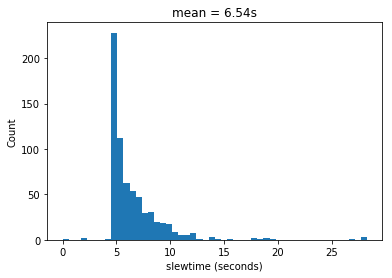

In [11]:
none = plt.hist(observations['slewtime'], bins=50)
plt.xlabel('slewtime (seconds)')
plt.ylabel('Count')
plt.title('mean = %.2fs' % np.mean(observations['slewtime']))

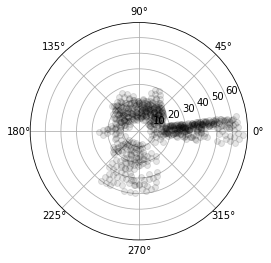

In [12]:
ax = plt.subplot(111, projection='polar')
ax.plot(np.radians(observations['az']), 90.-observations['alt'], 'ko', alpha=.1)

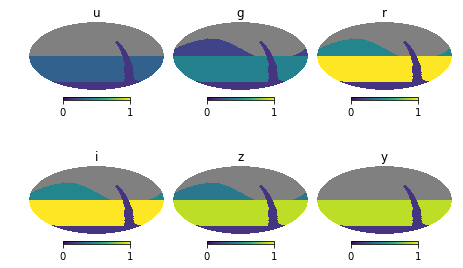

In [13]:
target_map = fs.standard_goals()
for i,key in enumerate(target_map):
    target_map[key][np.where(target_map[key] == 0)] = hp.UNSEEN
    hp.mollview(target_map[key], title=key, min=0, max=1,sub=(2,3, i+1))
plt.savefig('Plots/target_maps.pdf')

In [14]:
target_map[key]

array([ -1.63750000e+30,  -1.63750000e+30,  -1.63750000e+30, ...,
         1.50000000e-01,   1.50000000e-01,   1.50000000e-01])

In [50]:
# Let's look at the sky brightness percentiles
import lsst.sims.skybrightness_pre as sb
from lsst.sims.skybrightness_pre import M5percentiles
from lsst.sims.utils import _hpid2RaDec, _raDec2Hpid, Site, calcLmstLast, m5_flat_sed
per = M5percentiles()
sm = sb.SkyModelPre(preload=False, speedLoad=True)

In [16]:
sm.loaded_range

array([ 59579.03472222,  59588.36805555])

/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)


/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:284: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_skybrightness_pre/python/lsst/sims/skybrightness_pre/SkyModelPre.py:200: UserWarning: Requested MJD between sunrise and sunset, returning closest maps
  warnings.warn('Requested MJD between sunrise and sunset, returning closest maps')
/Users/yoachim/gitRepos/sims_ocs/python/lsst/sims/ocs/environment/seeing_model.py:61: RuntimeWarning: invalid value encountered in power
  airmass_correction = numpy.power(airmass, self.AIRMASS_CORRECTION_POWER)
/Users/yoachim/lsstp3/DarwinX86/healpy/1.10.3.lsst1+1/lib/python/healpy-1.10.3-py3.6-macosx-10.7-x86_64.egg/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
/

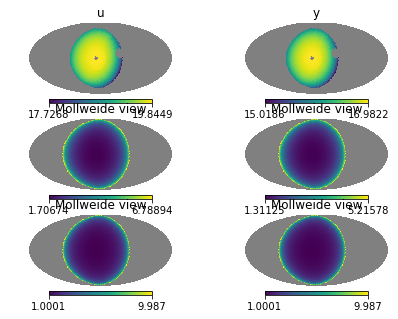

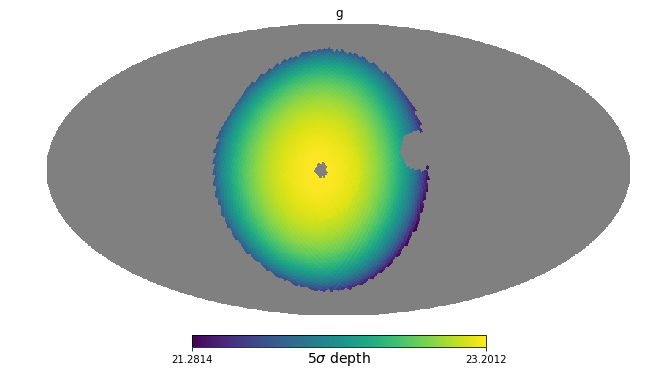

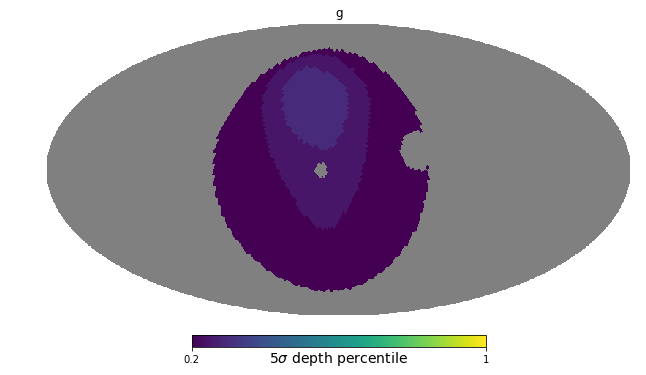

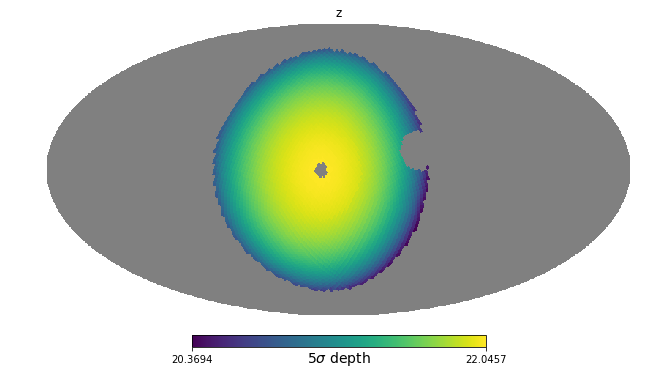

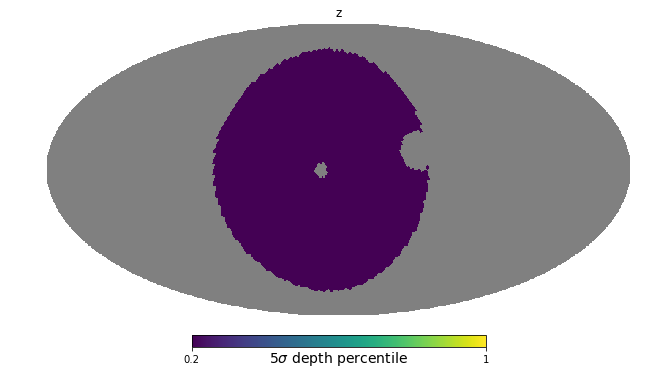

In [87]:
observatory.set_mjd(59586.0)
#observatory.set_mjd(59586.05) # moon up
#observatory.set_mjd(59586.15) # dark time
status = observatory.return_status()
r1 = status['lmst']*180/12

hp.mollview(status['skybrightness']['u'], rot=(r1,r2), sub=(3,2,1), title='u')
hp.mollview(status['skybrightness']['y'], rot=(r1,r2), sub=(3,2,2), title='y')
hp.mollview(status['FWHMeff_u'], rot=(r1,r2), sub=(3,2,3))
hp.mollview(status['FWHMeff_y'], rot=(r1,r2), sub=(3,2,4))
hp.mollview(status['airmass'], rot=(r1,r2), sub=(3,2,5))
hp.mollview(status['airmass'], rot=(r1,r2), sub=(3,2,6))

for filtername in ['g', 'z']:
    m5_u = m5_flat_sed(filtername, status['skybrightness'][filtername],
                                   status['FWHMeff_%s' % filtername],
                                   30., status['airmass'])
    mask = np.where(status['skybrightness'][filtername] < 0)
    m5_u[mask] = hp.UNSEEN

    hp.mollview(m5_u, rot=(r1,r2), title=filtername, unit=r'5$\sigma$ depth')
    percentile_u = per.m5map2percentile(m5_u, filtername)
    percentile_u[mask] = hp.UNSEEN

    hp.mollview(percentile_u, rot=(r1,r2), title=filtername, unit=r'5$\sigma$ depth percentile', min=.2, max=1)

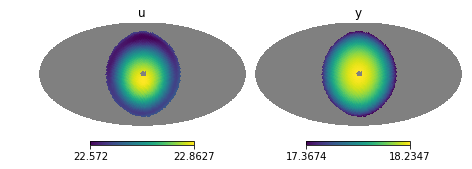

In [32]:
hp.mollview(mags['u'], rot=(r1,r2), sub=(1,2,1), title='u')
hp.mollview(mags['y'], rot=(r1,r2), sub=(1,2,2), title='y')


In [70]:
mjds = np.arange(59580, 59588.1, 0.05)
sun_alts = []
moon_alts = []
for mjd in mjds:
    info = sm.returnSunMoon(mjd)
    sun_alts.append(np.degrees(info['sunAlt']))
    moon_alts.append(np.degrees(info['moonAlt']))

In [71]:
good = np.where((np.array(sun_alts) < -18.) & (np.array(moon_alts) > 0.))

In [72]:
good

(array([102, 122, 142, 143]),)

In [76]:
mjds[122]

59586.100000000355